In [1]:
#https://github.com/AshishSardana/pulsars-candidate-classifier/blob/master/Pulsar%20Classification.ipynb
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

### Defined Functions

In [2]:
# Function to plot a correlation map
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [3]:
# Reading data 
data = [
    pd.read_csv("data/HTRU_2.csv", names= ["M1", "ST1", "EX1", "SK1", "M2", 
                                      "ST2", "EX2", "SK2", "Class"])
]

#put into data frame
pulsar = pd.concat(data, ignore_index=True) 

#check out the data
pulsar.head(2) 

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0


### Column Headers
- **M1** - Mean of the integrated profile.
- **ST1** - Standard deviation of the integrated profile. 
- **EX1** - Excess kurtosis of the integrated profile. 
- **SK1** - Skewness of the integrated profile. 
- **M2** - Mean of the DM-SNR curve.                               
- **ST2** - Standard deviation of the DM-SNR curve. 
- **EX2** - Excess kurtosis of the DM-SNR curve. 
- **SK2** - Skewness of the DM-SNR curve. 
- **Class** - Class

In [4]:
#check the shape of the data frame
pulsar.shape

(17898, 9)

In [5]:
#look for nulls
pulsar.isnull().any()

M1       False
ST1      False
EX1      False
SK1      False
M2       False
ST2      False
EX2      False
SK2      False
Class    False
dtype: bool

In [6]:
cols = list(pulsar.columns)
features = cols
features.remove('Class')

X = pulsar[features]
Y = pulsar['Class']

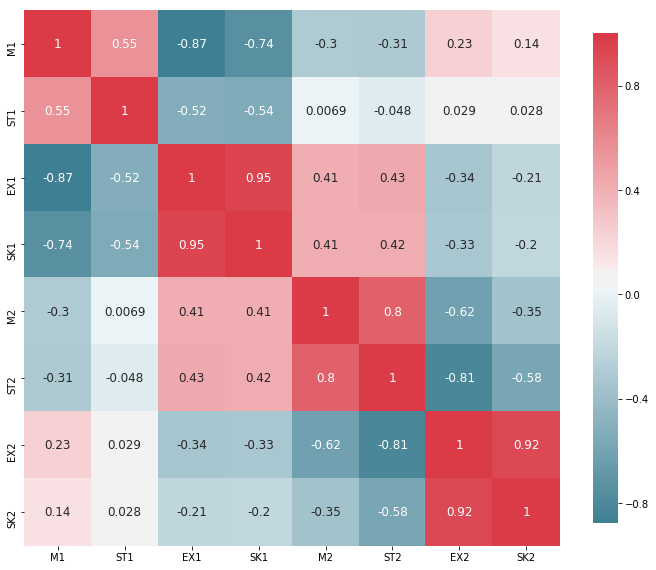

In [7]:
plot_correlation_map(X)